Data collected from us Census Bureau:  https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
output_file = "data_set/pop_data.csv"

In [2]:
file_path = "data_set/nst-est2019-alldata.csv"
pop_est = pd.read_csv(file_path)
pop_est.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [3]:
clean_data = pop_est.loc[:, ['NAME', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]              

clean_data.tail()

,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
52,Washington,6742830,6826627,6897058,6963985,7054655,7163657,7294771,7423362,7523869,7614893
53,West Virginia,1854239,1856301,1856872,1853914,1849489,1842050,1831023,1817004,1804291,1792147
54,Wisconsin,5690475,5705288,5719960,5736754,5751525,5760940,5772628,5790186,5807406,5822434
55,Wyoming,564487,567299,576305,582122,582531,585613,584215,578931,577601,578759
56,Puerto Rico,3721525,3678732,3634488,3593077,3534874,3473232,3406672,3325286,3193354,3193694


In [14]:
tx_vs_ca_df = clean_data.loc[(clean_data['NAME'] == 'Texas')|(clean_data['NAME'] == 'California')]
tx_vs_ca = tx_vs_ca_df.rename(columns={'NAME': 'State', 'POPESTIMATE2010': 'Population 2010', 'POPESTIMATE2011': 'Population 2011', 'POPESTIMATE2012': 'Population 2012',	'POPESTIMATE2013': 'Population 2013', 'POPESTIMATE2014': 'Population 2014',	'POPESTIMATE2015': 'Population 2015', 'POPESTIMATE2016': 'Population 2016',	'POPESTIMATE2017': 'Population 2017', 'POPESTIMATE2018': 'Population 2018', 'POPESTIMATE2019': 'Population 2019'})
# tx_vs_ca = tx_vs_ca.reset_index()
tx_vs_ca = tx_vs_ca
tx_vs_ca.to_csv(output_file, index=False)
tx_vs_ca.head()

,State,Population 2010,Population 2011,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
48,Texas,25241971,25645629,26084481,26480266,26964333,27470056,27914410,28295273,28628666,28995881


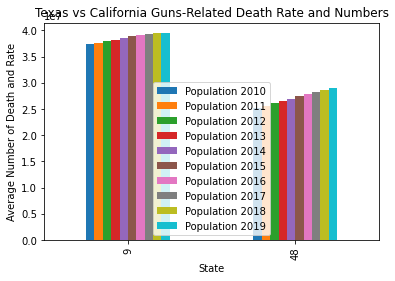

In [16]:
tx_vs_ca.plot.bar()
plt.title('Texas vs California Guns-Related Death Rate and Numbers')
plt.xlabel('State')
plt.ylabel('Average Number of Death and Rate')
plt.show()

In [20]:
tx_vs_ca.plot.line(x=tx_vs_ca.columns)
plt.title('Texas vs California Guns-Related Death Rate and Numbers')
plt.xlabel('State')
plt.ylabel('Average Number of Death and Rate')
plt.show()

ValueError: x must be a label or position